<a href="https://colab.research.google.com/github/beniamine3155/deep_learning_tensorflow/blob/main/9_tensorboard_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorboard demo using handwritten digits classification

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

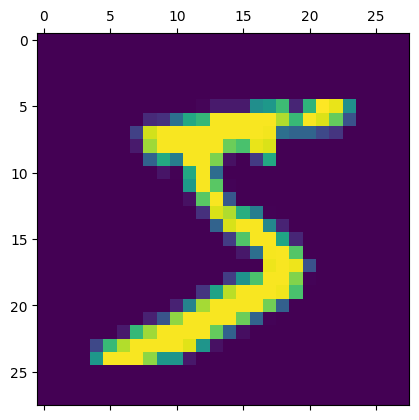

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8717 - loss: 0.4525
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9609 - loss: 0.1353
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9739 - loss: 0.0866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9813 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9856 - loss: 0.0477


In [14]:
model.get_weights()

[array([[-0.04102883, -0.06675452, -0.02652947, ...,  0.0268198 ,
          0.06276202, -0.07777972],
        [ 0.01878238,  0.05317415,  0.0057065 , ...,  0.07472722,
         -0.07095771, -0.0602255 ],
        [-0.07882269,  0.00045073,  0.03567994, ..., -0.08106984,
         -0.04907715,  0.04403479],
        ...,
        [-0.07342538,  0.05909222,  0.07254526, ..., -0.07441761,
          0.04129642, -0.00401179],
        [-0.05668759, -0.02331167, -0.0038252 , ...,  0.07942636,
          0.08164123,  0.07643472],
        [ 0.0353515 ,  0.03573238,  0.07270995, ...,  0.06237558,
          0.01630006, -0.01556658]], dtype=float32),
 array([ 0.16358265,  0.1637319 , -0.15276037,  0.14736612,  0.04447884,
         0.00961991,  0.03440417, -0.03341104,  0.10550485,  0.10678655,
         0.02775137, -0.00360409,  0.09291264,  0.03904651,  0.09650698,
         0.2890946 ,  0.10073375, -0.13181917, -0.13717267,  0.02465424,
        -0.11872061,  0.19998343,  0.09910021,  0.03360578,  0.058